In [13]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras

In [14]:
tfds.list_builders()

['abstract_reasoning',
 'aeslc',
 'aflw2k3d',
 'amazon_us_reviews',
 'arc',
 'bair_robot_pushing_small',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'cos_e',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'diabetic_retinopathy_detection',
 'dmlab',
 'downsampled_imagenet',
 'dsprites',
 'dtd',
 'duke_ultrasound',
 'dummy_dataset_shared_generator',
 'dummy_mnist',
 'emnist',
 'esnli',
 'eurosat',
 'fashion_mnist',
 'flic',
 'flores',
 'food101',
 'gap',
 'gigaword',
 'glue',
 'groove',
 'higgs',
 'horses_or_humans',
 'i_natura

In [15]:
mnist=tfds.load('fashion_mnist',split=tfds.Split.TRAIN)

In [16]:
mnist

<DatasetV1Adapter shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>

In [17]:
#mnist_numpy=tfds.as_numpy(mnist)
mnist_numpy=mnist

In [18]:
mnist_numpy=list(mnist_numpy)

In [19]:
len(mnist_numpy)

60000

In [20]:
mnist_numpy[0].keys()

dict_keys(['image', 'label'])

In [28]:
x_train=[]
y_train=[]
for data in mnist_numpy:
    x_train.append(data['image'].numpy())
    y_train.append(data['label'].numpy())

In [22]:
len(x_train)

60000

In [27]:
x_train[5].numpy().shape

(28, 28, 1)

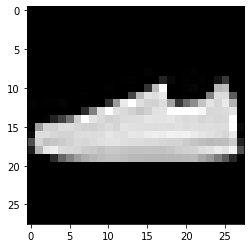

In [25]:
plt.imshow(np.reshape(x_train[6165],(28,28)),cmap='gray')

In [29]:
x_train=np.asarray(x_train,dtype=np.float32)

In [43]:
x_train.shape,x_train.dtype

((60000, 28, 28, 1), dtype('float32'))

In [44]:
y_train[6165]

7

In [52]:
y_train=np.asarray(y_train,dtype=np.int32)

In [53]:
y_train.dtype

dtype('int32')

In [54]:
y_train=tf.one_hot(y_train,depth=10)

In [55]:
y_train[6165]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)>

In [56]:
y_train=tfds.as_numpy(y_train)

In [57]:
y_train.shape

(60000, 10)

In [58]:
x_train=x_train/255

In [60]:
x_train.max()

1.0

In [62]:
model=keras.Sequential()

In [64]:
from tensorflow.keras.layers import Dense,Flatten,Conv2D

In [66]:
model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10))

In [67]:
model.compile(optimizer='adam',
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [68]:
model.fit(x_train,y_train,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 11s 182us/sample - loss: 0.4940 - accuracy: 0.8259
Epoch 2/5
60000/60000 [==============================] - 11s 179us/sample - loss: 0.3767 - accuracy: 0.8643
Epoch 3/5
60000/60000 [==============================] - 10s 163us/sample - loss: 0.3372 - accuracy: 0.8770
Epoch 4/5
60000/60000 [==============================] - 11s 186us/sample - loss: 0.3148 - accuracy: 0.8839
Epoch 5/5
60000/60000 [==============================] - 11s 185us/sample - loss: 0.2958 - accuracy: 0.8903


In [122]:
mnist_test=tfds.load('fashion_mnist',split=tfds.Split.TEST)
mnist_test=tfds.as_numpy(mnist_test)
mnist_test=list(mnist_test)

In [123]:
x_test=[]
y_test=[]
for data in mnist_test:
    x_test.append(data['image'])
    y_test.append(data['label'])

In [72]:
len(x_test)

10000

In [127]:
x_test=np.asarray(x_test,dtype=np.float32)

In [128]:
x_test.shape

(10000, 28, 28, 1)

In [129]:
x_test.max()

255.0

In [77]:
x_test=x_test/255

In [80]:
len(y_test)

10000

In [124]:
y_test=np.asarray(y_test,dtype=np.int32)

In [125]:
y_test.dtype

dtype('int32')

In [104]:
y_test=tf.one_hot(y_test,depth=10)

In [105]:
y_test=tfds.as_numpy(y_test)

In [106]:
y_test.shape

(10000, 10)

In [107]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 96us/sample - loss: 0.3465 - accuracy: 0.8772


[0.3465489049434662, 0.8772]

In [88]:
predictions=model.predict_classes(x_test,)

In [89]:
from sklearn.metrics import classification_report

In [91]:
print(classification_report(y_test,predictions,))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.79      0.79      0.79      1000
           3       0.87      0.89      0.88      1000
           4       0.83      0.73      0.78      1000
           5       0.97      0.96      0.96      1000
           6       0.66      0.72      0.69      1000
           7       0.91      0.97      0.94      1000
           8       0.98      0.96      0.97      1000
           9       0.97      0.93      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [92]:
from tensorflow.keras.datasets import fashion_mnist

In [93]:
(m_train,n_train),(m_test,n_test)=fashion_mnist.load_data()

In [94]:
m_train.shape

(60000, 28, 28)

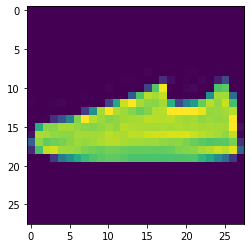

In [97]:
plt.imshow(x_train[6165].reshape((28,28)))

## With more neurons

In [114]:
model=keras.Sequential()
model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(units=1024,activation=tf.nn.relu))
model.add(Dense(units=10,activation=tf.nn.softmax))
model.compile(optimizer='adam',
             loss=keras.losses.CategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 22s 369us/sample - loss: 1.7253 - accuracy: 0.7374
Epoch 2/10
60000/60000 [==============================] - 22s 369us/sample - loss: 1.6798 - accuracy: 0.7810
Epoch 3/10
60000/60000 [==============================] - 22s 368us/sample - loss: 1.6752 - accuracy: 0.7854
Epoch 4/10
60000/60000 [==============================] - 23s 379us/sample - loss: 1.6712 - accuracy: 0.7894
Epoch 5/10
60000/60000 [==============================] - 22s 373us/sample - loss: 1.6668 - accuracy: 0.7939
Epoch 6/10
60000/60000 [==============================] - 22s 363us/sample - loss: 1.6182 - accuracy: 0.8425
Epoch 7/10
60000/60000 [==============================] - 24s 405us/sample - loss: 1.6030 - accuracy: 0.8580
Epoch 8/10
60000/60000 [==============================] - 22s 374us/sample - loss: 1.5974 - accuracy: 0.8635
Epoch 9/10
60000/60000 [==============================] - 23s 390us/sample - loss: 1.5926 - accuracy: 0.8

In [110]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 2s 234us/sample - loss: 1.6995 - accuracy: 0.7611


[1.6995125663757324, 0.7611]

In [112]:
model=keras.Sequential()
model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(units=512,activation=tf.nn.relu))
model.add(Dense(units=10,activation=tf.nn.softmax))
model.compile(optimizer='adam',
             loss=keras.losses.CategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 19s 311us/sample - loss: 1.7074 - accuracy: 0.7570
Epoch 2/5
60000/60000 [==============================] - 18s 298us/sample - loss: 1.6256 - accuracy: 0.8358
Epoch 3/5
60000/60000 [==============================] - 19s 310us/sample - loss: 1.6107 - accuracy: 0.8508
Epoch 4/5
60000/60000 [==============================] - 17s 288us/sample - loss: 1.6039 - accuracy: 0.8575
Epoch 5/5
60000/60000 [==============================] - 20s 337us/sample - loss: 1.5997 - accuracy: 0.8613


In [113]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 2s 180us/sample - loss: 1.6107 - accuracy: 0.8516


[1.6107397249221802, 0.8516]

### Try without normalizing the data

In [118]:
model=keras.Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=512,activation=tf.nn.relu))
model.add(Dense(units=10,activation=tf.nn.softmax))
model.compile(optimizer='adam',
             loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model.fit(m_train,n_train,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 17s 276us/sample - loss: 2.3610 - accuracy: 0.1001
Epoch 2/5
60000/60000 [==============================] - 17s 285us/sample - loss: 2.3612 - accuracy: 0.1000
Epoch 3/5
60000/60000 [==============================] - 17s 281us/sample - loss: 2.3612 - accuracy: 0.1000
Epoch 4/5
60000/60000 [==============================] - 18s 295us/sample - loss: 2.3612 - accuracy: 0.1000
Epoch 5/5
60000/60000 [==============================] - 19s 308us/sample - loss: 2.3612 - accuracy: 0.1000


In [119]:
model.evaluate(m_test,n_test)

10000/10000 [==============================] - 2s 164us/sample - loss: 2.3612 - accuracy: 0.1000


[2.3611501693725585, 0.1]

In [130]:
model.evaluate(x_test.reshape((-1,28,28)),y_test)

10000/10000 [==============================] - 2s 175us/sample - loss: 2.3612 - accuracy: 0.1000


[2.3611501693725585, 0.1]